In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r"C:\Users\admin\Desktop\Excelr Assignments\Assignment 17\SalaryData_Train(1).csv")
df2 = pd.read_csv(r"C:\Users\admin\Desktop\Excelr Assignments\Assignment 17\SalaryData_Test(1).csv")

In [3]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
df1.shape

(30161, 14)

In [8]:
df2.shape

(15060, 14)

In [9]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
df2.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
df1.duplicated().sum()

3258

In [12]:
df2.duplicated().sum()

930

In [13]:
df1 = df1.drop_duplicates()

In [14]:
df1.duplicated().sum()

0

In [15]:
df2 = df2.drop_duplicates()

In [16]:
df2.duplicated().sum()

0

In [17]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [18]:
df1['Salary1']= pd.get_dummies(df1['Salary'], drop_first=True)

In [19]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Salary1
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


In [20]:
df1.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary1
age,1.000000,0.038048,0.077235,0.052684,0.072529,0.223502
educationno,0.038048,1.000000,0.126085,0.080025,0.145491,0.332178
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403,0.228865
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093,0.153287
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000,0.225812
Salary1,0.223502,0.332178,0.228865,0.153287,0.225812,1.000000


In [21]:
df1.corr()['Salary1']

age             0.223502
educationno     0.332178
capitalgain     0.228865
capitalloss     0.153287
hoursperweek    0.225812
Salary1         1.000000
Name: Salary1, dtype: float64

In [22]:
df1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'Salary1'],
      dtype='object')

In [23]:
features = ['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary']

In [24]:
for feature in features:
    unique_features = df1[feature].unique()
    num_features = df1[feature].nunique()
    
    if num_features <= 10:
        print('{} has {} values as {}'.format(feature, num_features, unique_features))
    else:
        print('{} has {} values as {}......'.format(feature, num_features, unique_features[0:10]))

age has 72 values as [39 50 38 53 28 37 49 52 31 42]......
workclass has 7 values as [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education has 16 values as [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc']......
educationno has 16 values as [13  9  7 14  5 10 12  4 16 11]......
maritalstatus has 7 values as [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation has 14 values as [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support']......
relationship has 6 values as [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race has 5 values as [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex has 2 value

In [25]:
df1['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [26]:
df1['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [27]:
# Droping Education Column from Data

In [28]:
df1 = df1.drop('education', axis=1)
df2 = df2.drop('education', axis=1)

In [29]:
df1.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary', 'Salary1'],
      dtype='object')

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

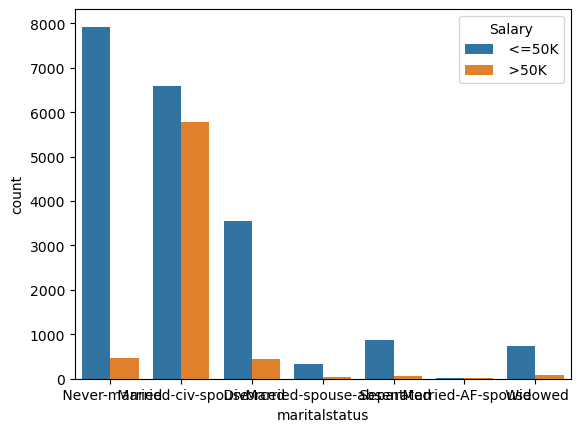

In [30]:
sns.countplot(df1['maritalstatus'],hue=df1['Salary'])

<AxesSubplot:xlabel='race', ylabel='count'>

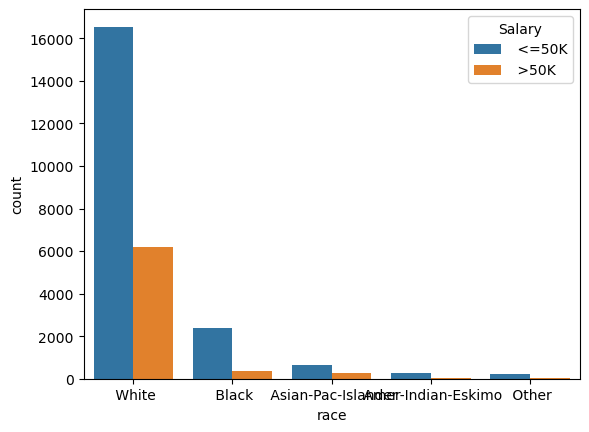

In [31]:
sns.countplot(df1['race'],hue=df1['Salary'])

<AxesSubplot:xlabel='sex', ylabel='count'>

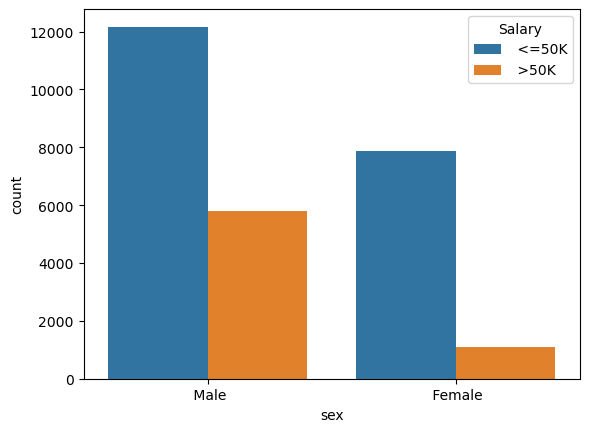

In [32]:
sns.countplot(df1['sex'],hue=df1['Salary'])

<AxesSubplot:xlabel='workclass', ylabel='count'>

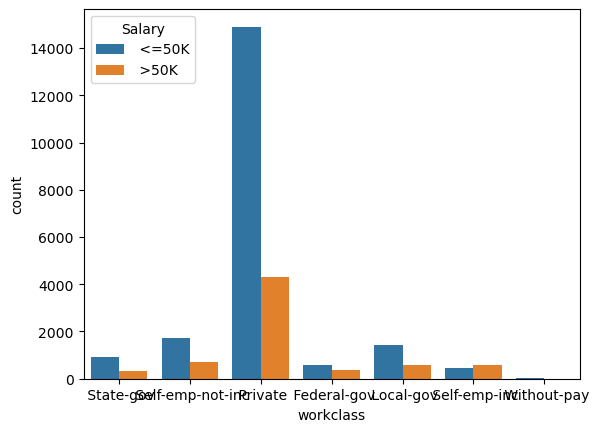

In [33]:
sns.countplot(df1['workclass'],hue=df1['Salary'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

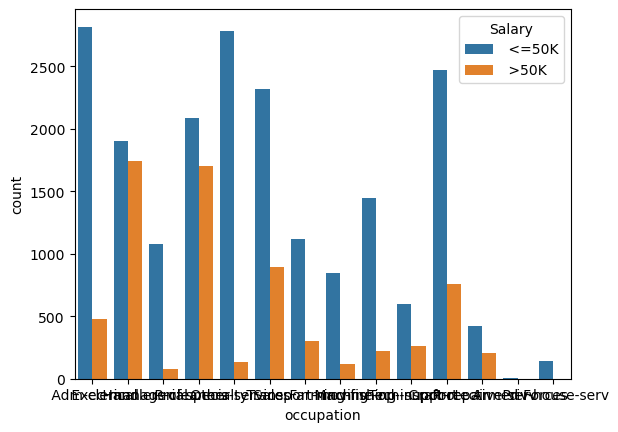

In [34]:
sns.countplot(df1['occupation'],hue=df1['Salary'])

<AxesSubplot:xlabel='age', ylabel='Density'>

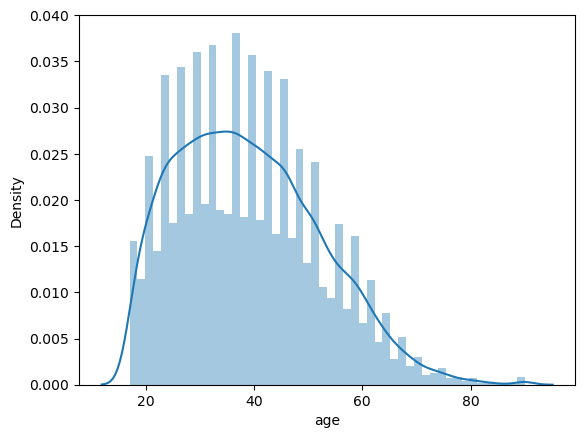

In [35]:
sns.distplot(df1['age'])

<AxesSubplot:xlabel='age'>

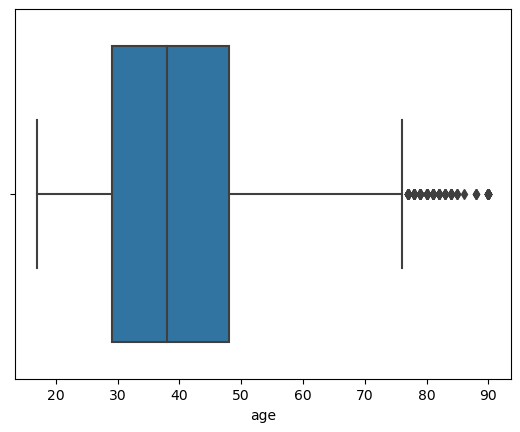

In [36]:
sns.boxplot(df1['age'])


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

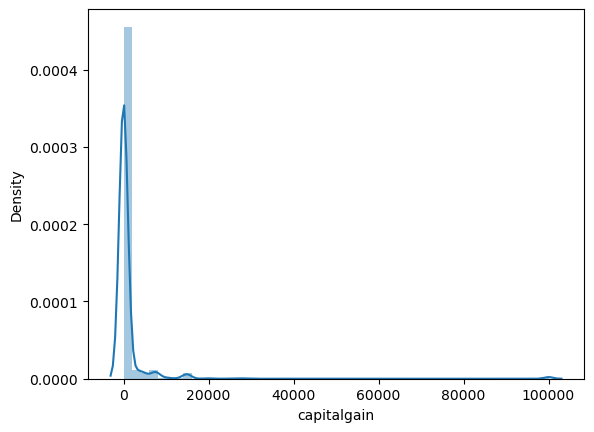

In [37]:
sns.distplot(df1['capitalgain'])

<AxesSubplot:xlabel='capitalgain'>

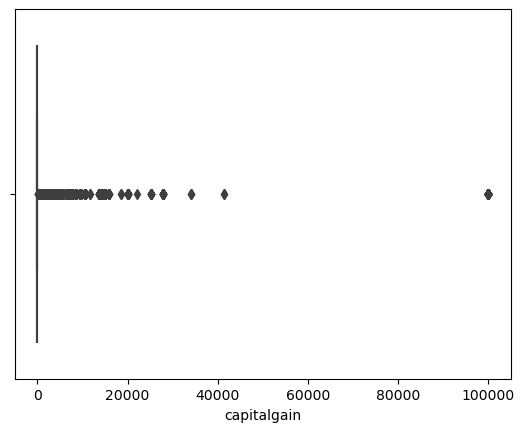

In [38]:
sns.boxplot(df1['capitalgain'])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

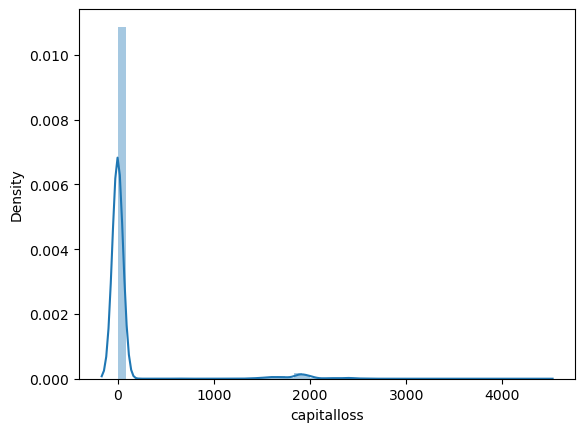

In [39]:
sns.distplot(df1['capitalloss'])

<AxesSubplot:xlabel='capitalloss'>

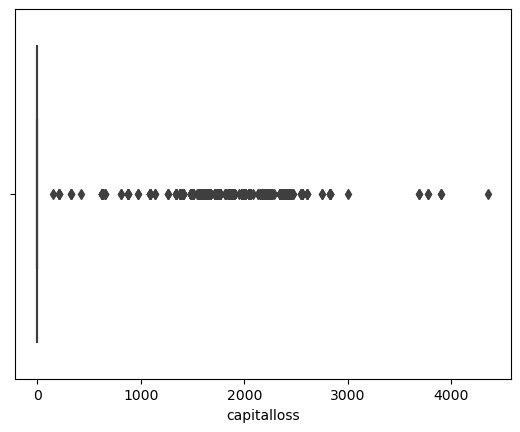

In [40]:
sns.boxplot(df1['capitalloss'])

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

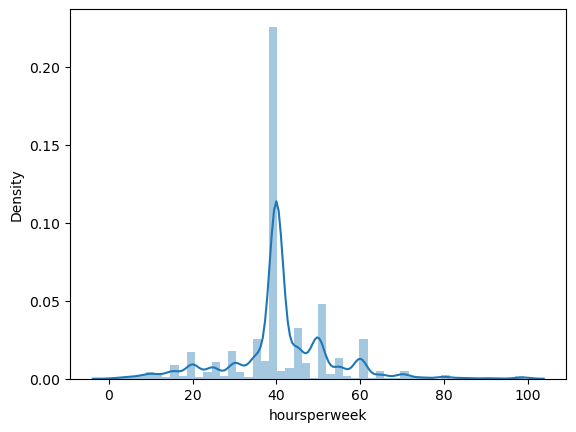

In [41]:
sns.distplot(df1['hoursperweek'])

<AxesSubplot:xlabel='hoursperweek'>

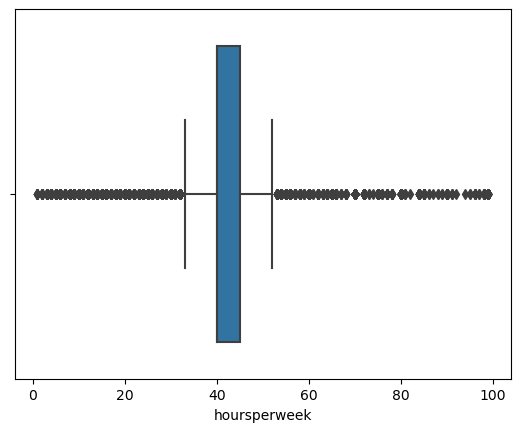

In [42]:
sns.boxplot(df1['hoursperweek'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

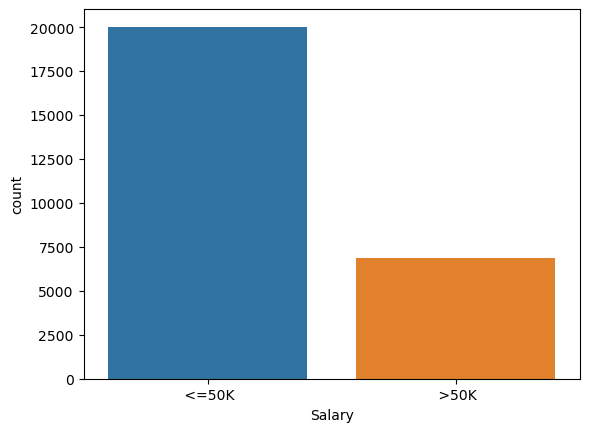

In [43]:
sns.countplot(df1['Salary'])

<AxesSubplot:ylabel='Salary'>

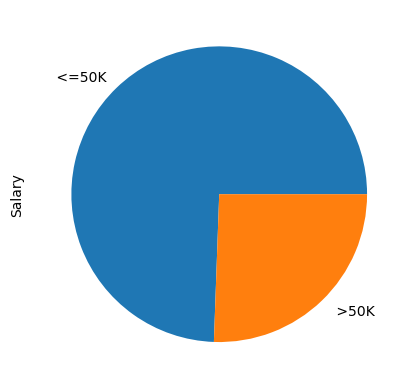

In [44]:
df1['Salary'].value_counts().plot(kind= 'pie')

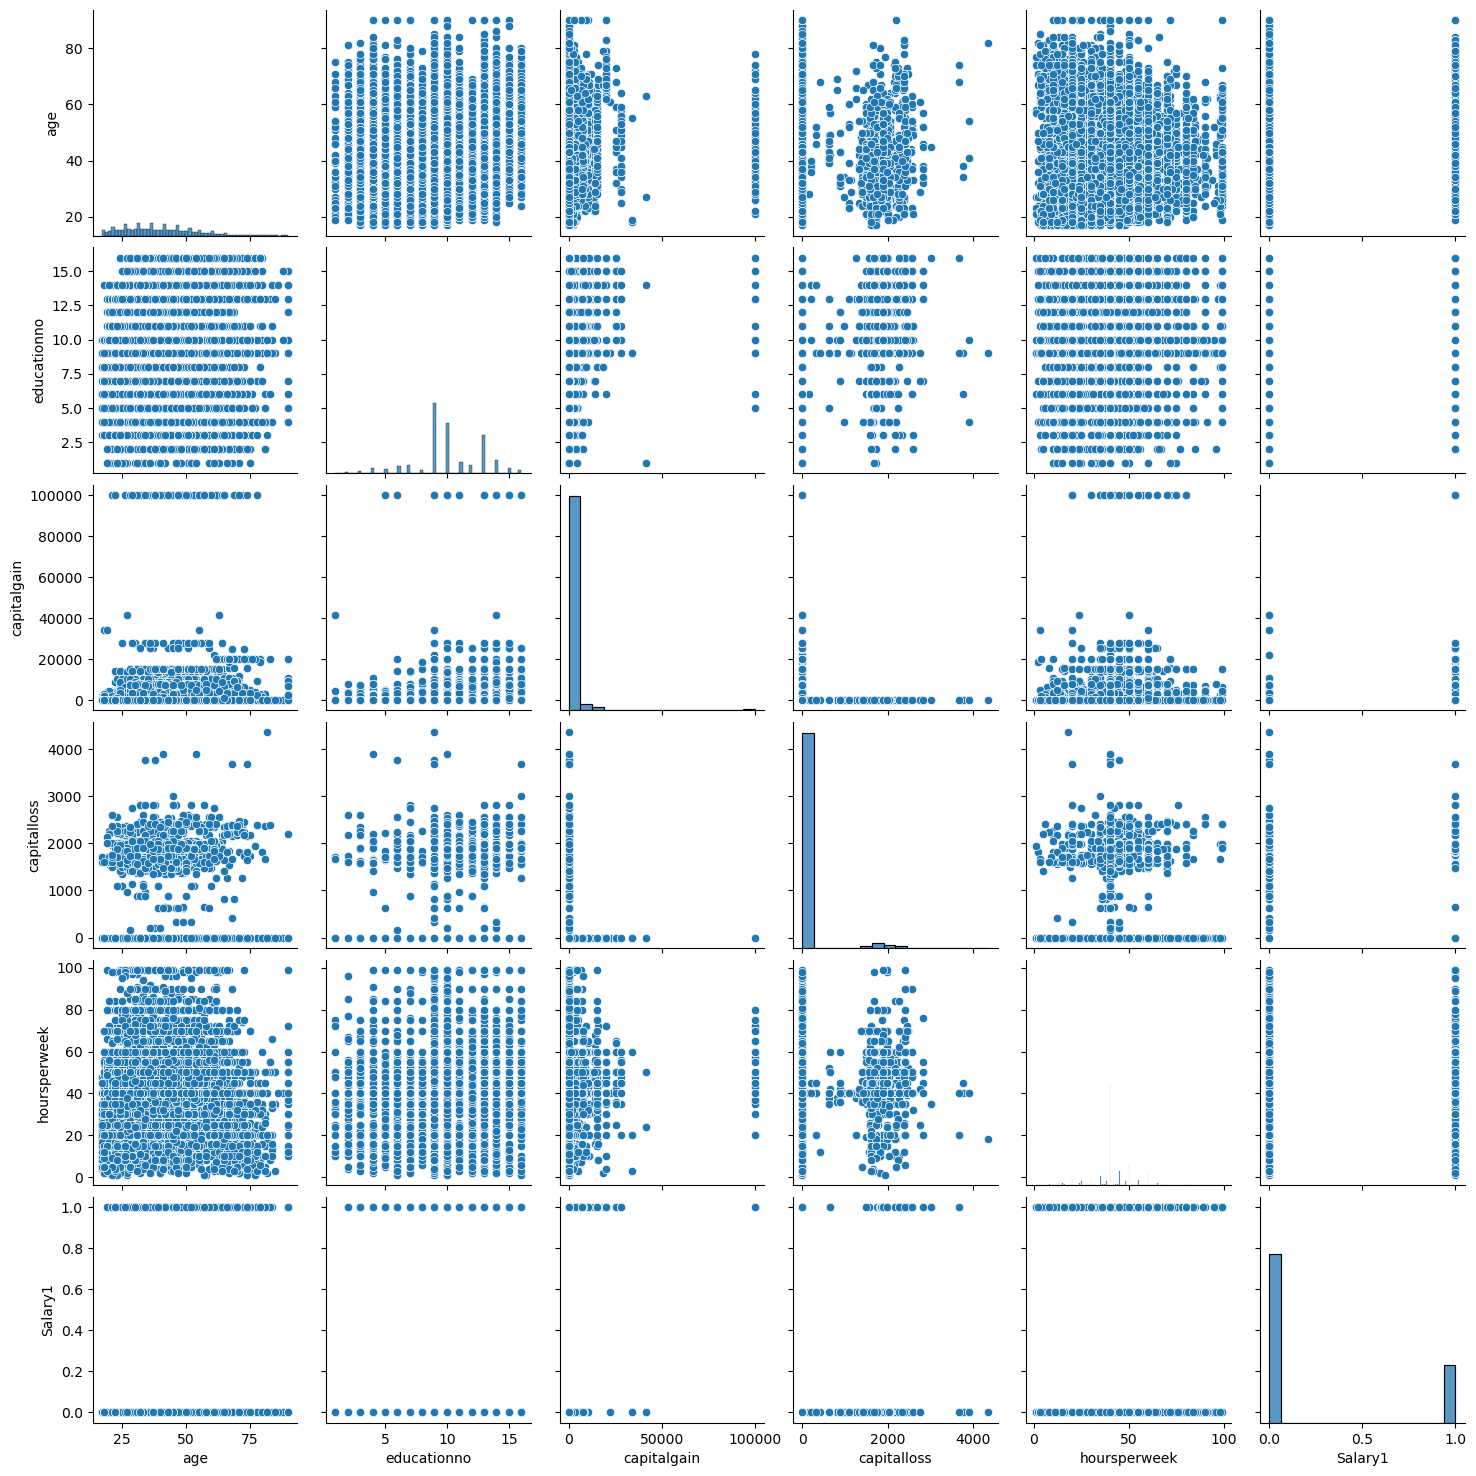

In [45]:
sns.pairplot(df1)

In [46]:
#Split Data
X = df1.drop(['Salary','Salary1'], axis=1)
y = df1['Salary']

In [47]:
X

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
30155,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
30156,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30158,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [48]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30154      >50K
30155     <=50K
30156     <=50K
30158     <=50K
30160      >50K
Name: Salary, Length: 26903, dtype: object

In [49]:
y.value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [50]:
# Pipeline for Preporcessing and Calassification

In [52]:
X

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
30155,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
30156,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30158,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [53]:
X.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native'],
      dtype='object')

In [54]:
# Numerical Transformation

In [55]:
num_col = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']
Numerical_Trans = MinMaxScaler()

In [56]:
cat_col = ['workclass','educationno','maritalstatus', 'occupation','relationship', 'race', 'sex', 'native']
Catigorical_Trans = OneHotEncoder(handle_unknown='ignore')

In [57]:
preprocessor = ColumnTransformer(transformers=[('num',Numerical_Trans, num_col),('cat',Catigorical_Trans,cat_col)])

In [58]:
# Pipline

In [59]:
pipe = Pipeline(steps=[('preprocessor', preprocessor)])

In [60]:
x = pipe.fit_transform(X)

In [61]:
x = x.todense()

In [62]:
# train test split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
clf = SVC()

In [65]:
#fit
clf.fit(x_train,y_train)
#model score in 3 digit after decimal
print('Model Scroe: %.3f' % clf.score(x_test,y_test))


Model Scroe: 0.832


In [66]:
# Grid serarch CV

In [67]:
poly_param = {'kernel': ['poly'], 'gamma': [1, 0.5], 'degree': [2], 'C': [1]}

In [68]:
poly_grid= GridSearchCV(clf, param_grid=poly_param, cv=3)
poly_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1], 'degree': [2], 'gamma': [1, 0.5],
                         'kernel': ['poly']})

In [69]:
poly_grid.best_params_, poly_grid.best_score_

({'C': 1, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, 0.8381191339094879)